# ASMR Stock Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Stock Data

In [40]:
stock = pd.read_csv('./Ford.csv')
stock['Volume'] = stock['Vol']*100000
stock['Percent'] = stock['Change']/100
stock.drop(columns=['Vol'], inplace=True)
stock['Date'] = pd.to_datetime(stock['Date'])
stock['HighLow'] = stock['High'] - stock['Low']
# stock.drop(columns=['Change'], inplace=True)
stock.head()

,Date,Close,Open,High,Low,Change,Volume,Percent,HighLow
0,2025-01-06,9.76,9.90,10.03,9.74,0.40,6384000.0,0.0040,0.29
1,2025-01-07,9.61,9.79,9.85,9.57,-1.61,6240000.0,-0.0161,0.28
2,2025-01-08,9.59,9.59,9.60,9.43,-0.20,6168000.0,-0.0020,0.17
3,2025-01-10,9.50,9.52,9.68,9.44,-0.92,7337000.0,-0.0092,0.24
4,2025-01-13,9.56,9.51,9.57,9.42,0.62,6602000.0,0.0062,0.15


In [55]:
# Calculate Moving Averages
# Calculate a 3-period Simple Moving Average (SMA)
stock['SMA_100d'] = stock['Close'].rolling(window=100).mean()
stock['SMA_7d'] = stock['Close'].rolling(window=7).mean()
stock[['SMA_100d','SMA_7d']].describe()

,SMA_100d,SMA_7d
count,123.000000,216.000000
mean,10.757906,10.850985
std,0.633185,1.116834
min,9.843400,9.137143
25%,10.219050,9.940000
50%,10.698700,10.622143
75%,11.262500,11.667143
max,11.939200,13.244286


# Print Summary Stats

In [25]:
stock[['Close','Open','High','Low','Volume','Percent','Change']].describe()

,Close,Open,High,Low,Volume,Percent,Change
count,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000,222.000000
mean,10.860405,10.842342,10.993784,10.716396,9.666572e+06,0.001455,0.145450
std,1.154385,1.157315,1.156565,1.153117,5.721746e+06,0.021699,2.169865
min,8.690000,8.500000,9.110000,8.440000,3.314000e+06,-0.074900,-7.490000
25%,9.952500,9.925000,10.112500,9.810000,6.368500e+06,-0.010275,-1.027500
50%,10.655000,10.620000,10.760000,10.515000,7.926500e+06,0.002700,0.270000
75%,11.680000,11.690000,11.790000,11.587500,1.168900e+07,0.012075,1.207500
max,13.840000,13.800000,13.970000,13.300000,4.798400e+07,0.121600,12.160000


# Closing Prices

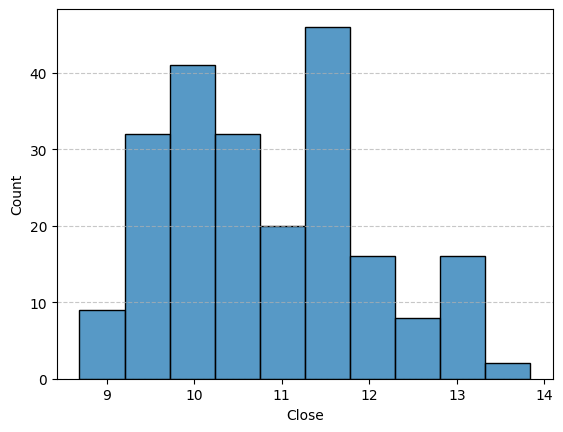

In [20]:
sns.histplot(x='Close',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

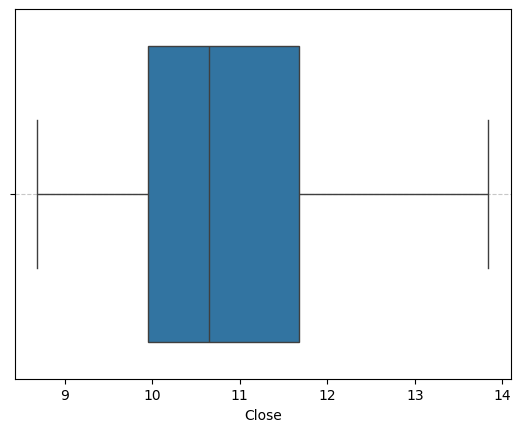

In [21]:
sns.boxplot(x='Close',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Percent Change

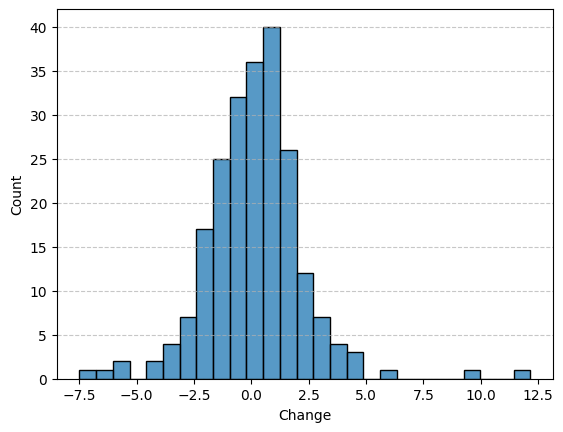

In [26]:
sns.histplot(x='Change',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

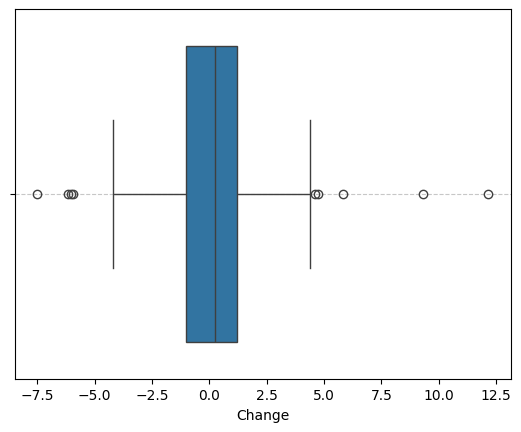

In [27]:
sns.boxplot(x='Change',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate and Plot High - Low

In [28]:

stock['HighLow'].describe()

count    222.000000
mean       0.277387
std        0.158666
min        0.090000
25%        0.172500
50%        0.240000
75%        0.320000
max        1.260000
Name: HighLow, dtype: float64

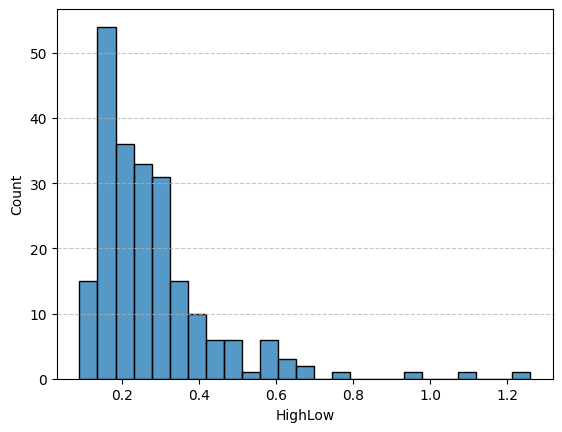

In [30]:
sns.histplot(x='HighLow',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

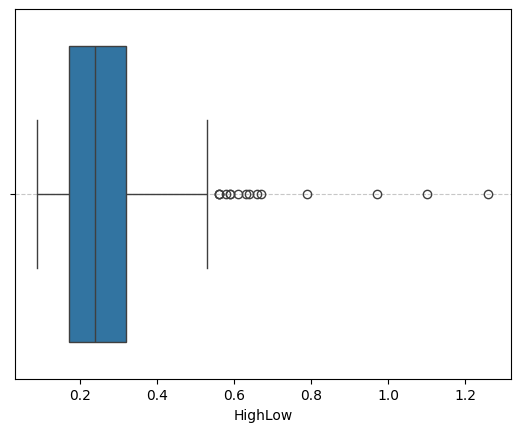

In [31]:
sns.boxplot(x='HighLow',data=stock)
# The key is specifying axis='y'
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot High Low

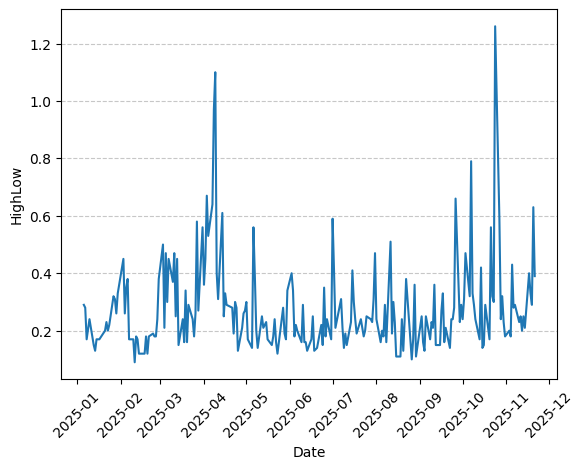

In [43]:
sns.lineplot(x='Date',y='HighLow',data=stock)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 100 Day Moiving Average

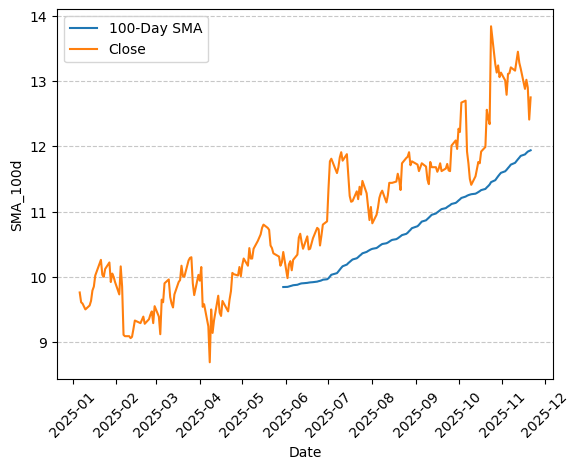

In [51]:
sns.lineplot(x='Date',y='SMA_100d',data=stock,  label='100-Day SMA')
sns.lineplot(x='Date',y='Close',data=stock,label='Close')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

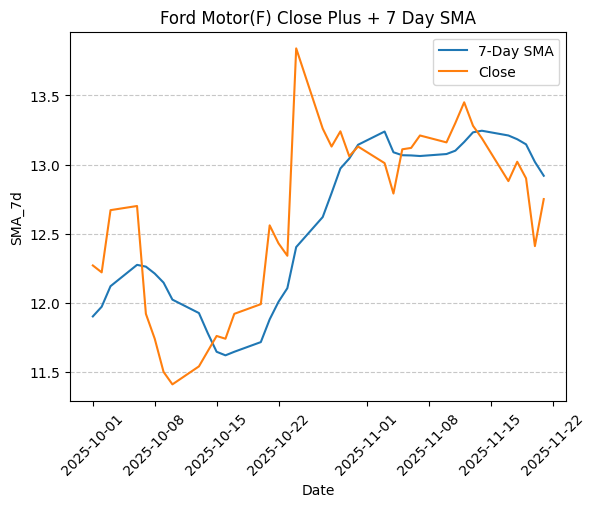

In [62]:
seven_day_sma = stock.query('Date >="2025-10-01"')
sns.lineplot(x='Date',y='SMA_7d',data=seven_day_sma,  label='7-Day SMA')
sns.lineplot(x='Date',y='Close',data=seven_day_sma,label='Close')
plt.xticks(rotation=45)
plt.grid(alinestyle='--', alpha=0.7)
plt.title("Ford Motor(F) Close Plus + 7 Day SMA")
plt.show()